# Download

In [ ]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 39 (delta 0), reused 4 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (39/39), 186.94 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (11/11), done.


In [ ]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data
!rm -rf ./ntc-scv

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./data/data_train/train/pos/31228.txt  
  inflating: ./data/data_train/train/pos/3123.txt  
  inflating: ./data/data_train/train/pos/31232.txt  
  inflating: ./data/data_train/train/pos/31233.txt  
  inflating: ./data/data_train/train/pos/31234.txt  
  inflating: ./data/data_train/train/pos/31236.txt  
  inflating: ./data/data_train/train/pos/31238.txt  
  inflating: ./data/data_train/train/pos/31240.txt  
  inflating: ./data/data_train/train/pos/31242.txt  
  inflating: ./data/data_train/train/pos/31247.txt  
  inflating: ./data/data_train/train/pos/31250.txt  
  inflating: ./data/data_train/train/pos/31251.txt  
  inflating: ./data/data_train/train/pos/31252.txt  
  inflating: ./data/data_train/train/pos/31257.txt  
  inflating: ./data/data_train/train/pos/31260.txt  
  inflating: ./data/data_train/train/pos/31261.txt  
  inflating: ./data/data_train/train/pos/31262.txt  
  inflating: ./data/data_train/train/pos/31

In [ ]:
import os
import pandas as pd
def load_data_from_path(folder_path):
  examples = []
  for label in os.listdir(folder_path):
    full_path = os.path.join(folder_path, label)
    for file_name in os.listdir(full_path):
      file_path = os.path.join(full_path, file_name)
      with open(file_path, 'r',encoding='utf-8') as f:
        lines = f.readlines()
        sentence = " ".join(lines)
        if label == "neg":
          lable = 0
        if label == "pos":
          lable = 1
        data = {
            'sentence': sentence,
            'label': lable
        }
        examples.append(data)
  return pd.DataFrame(examples)

In [ ]:
folder_path = {
    'train': './data/data_train/train',
    'vaild': './data/data_train/test',
    'test': './data/data_test/test'
}
train_df = load_data_from_path(folder_path['train'])
valid_df = load_data_from_path(folder_path['vaild'])
test_df = load_data_from_path(folder_path['test'])

In [ ]:
train_df.head()

,sentence,label
0,Mình đến ăn cùng_với 2 người bạn .\n Nhân_viên...,1
1,"Mình đến quán được hai lần , lần đầu đi với nh...",1
2,Chi_nhánh ở Rex là chỗ mình thường_xuyên đi nh...,1
3,"Đi ngang thấy quán mới mở khá rộng_rãi , thoán...",1
4,Đến roofboom vào một_chiều thu tháng 10\n ( mư...,1


# Preproccesing

## Language detection

In [ ]:
! pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=2bb0f1034e6b29264dcd2dd275c68c781fc57ead5a452cf1455b2edac72c9f06
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
from langid.langid import LanguageIdentifier, model
def identify_language(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row['sentence'])
        if(score[0]!='vi' or (score[0]=='vi' and score[1]<=THRESHOLD)):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [ ]:
train_df_vi, train_df_other = identify_language(train_df)

In [ ]:
train_df_vi

,sentence,label
0,Mình đến ăn cùng_với 2 người bạn .\n Nhân_viên...,1
1,"Mình đến quán được hai lần , lần đầu đi với nh...",1
2,Chi_nhánh ở Rex là chỗ mình thường_xuyên đi nh...,1
3,"Đi ngang thấy quán mới mở khá rộng_rãi , thoán...",1
4,Đến roofboom vào một_chiều thu tháng 10\n ( mư...,1
...,...,...
29995,Mình thấy trái_cây k tươi lắm k ngon lắm . Ăn ...,0
29996,Kem xôi ăn khá ngon nhưng dừa ăn hơi ngọt . Nế...,0
29997,"Hi ,\n Quán_ăn cũng được , chỉ tiếc là người g...",0
29998,Trước_hết mình xin nói đây là quán nướng do ng...,0


In [ ]:
train_df_other

,sentence,label
7,"Do an tuoi ngon , phuc vu than thien nhiet tin...",1
69,"Well , I must say I was very surprised to find...",1
94,"Soory I can ' t write in Vietnamese , but I lo...",1
265,Quan co mon tom tich chay toi rat ngon ma gia ...,1
411,The dish is kept warm as I expected .\n There ...,1
...,...,...
29119,"Quan nay cang ngay cang xuong cap , minh vao a...",0
29155,Chi co nguoi ngoai tinh moi dam an . Ban co 40...,0
29316,I have reserve 6pm table for 4 on 5th Oct.But ...,0
29355,This place does serve singapore food but the t...,0


## preprocessing

In [ ]:
import string
import re
def preprocess_text(text):
    # Remove URLS https://www.
    url_pattern = re.compile(r'https?://\s+|www\.\s+')
    text = url_pattern.sub(r' ', text)

    # Remove HTML Tags: <>
    html_pattern = re.compile('<[^<>]+>')
    text = html_pattern.sub(r' ', text)

    # Remove puncs and digits
    replace_chars = list(string.punctuation+string.digits)
    for char in replace_chars:
        text = text.replace(char, ' ')

    # Remove Emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"# emoticons
        u"\U0001F300-\U0001F5FF"# symbols & pictograp
        u"\U0001F680-\U0001F6FF"# transport & map sym
        u"\U0001F1E0-\U0001F1FF"# flags (i0s)
        u"\U0001F1F2-\U0001F1F4"# Macau flag
        u"\U0001F1E6-\U0001F1FF"# flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U00002780"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)

    # normalize whitespace
    text = " ".join(text.split())

    # lowercasing
    text = text.lower()
    return text

In [ ]:
train_df_vi['sentence'][0]

'Mình đến ăn cùng_với 2 người bạn .\n Nhân_viên phục_vụ và giải_thích món ăn rất tận_tình . Chưa nói đến món ăn ngon hay_dở , thấy phong_cách phục_vụ là cho điểm cộng rồi , hơn_nữa các anh rất xinh trai . Hehe . Món ăn nêm nếm vừa_miệng , tuy có món răng mực làm hơi khô 1 tí nhưng vẫn chấp_nhận được .\n Món ăn bắt_nguồn là các món Hà_Nội vì chị chủ là người Hà_Nội .\n'

In [ ]:
preprocess_text(train_df_vi['sentence'][0])

'mình đến ăn cùng với người bạn nhân viên phục vụ và giải thích món ăn rất tận tình chưa nói đến món ăn ngon hay dở thấy phong cách phục vụ là cho điểm cộng rồi hơn nữa các anh rất xinh trai hehe món ăn nêm nếm vừa miệng tuy có món răng mực làm hơi khô tí nhưng vẫn chấp nhận được món ăn bắt nguồn là các món hà nội vì chị chủ là người hà nội'

In [ ]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

<ipython-input-14-e21d2b59a2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


## EDA

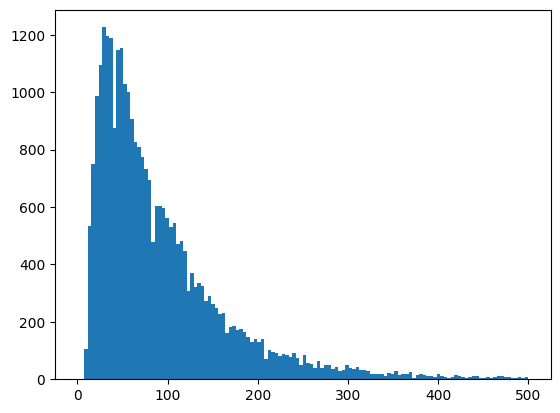

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(sentence.split()) for sentence in train_df_vi['preprocess_sentence']],bins=128,range=(0,500))
plt.show()

In [ ]:
from collections import Counter
words = []
[[words.append(word) for word in sentence.split()] for sentence in train_df_vi['preprocess_sentence']]
vocabulary = Counter(words)
len(vocabulary), len(words)

(17244, 2856797)

**Text Representation**

In [ ]:
!pip install -q torchtext==0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.

In [ ]:
def yield_tokens(sentences,tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

In [ ]:
# word-based tokenizer
tokenizer(train_df_vi['preprocess_sentence'][0])[:5]

['mình', 'đến', 'ăn', 'cùng', 'với']

In [ ]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator
vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'],tokenizer),
    max_tokens=vocab_size,
    specials=["<pad>","<unk>"])
vocabulary.set_default_index(vocabulary["<unk>"])

In [ ]:
vocabulary["<pad>"]

0

In [ ]:
from torchtext.data.functional import to_map_style_dataset
def prepare_dataset(df):
  for index, row in df.iterrows():
    sentence = row['preprocess_sentence']
    encoded_sentence = vocabulary(tokenizer(sentence))
    label = row['label']
    yield encoded_sentence, label

train_dataset = to_map_style_dataset(prepare_dataset(train_df_vi))
valid_dataset = to_map_style_dataset(prepare_dataset(valid_df))

# Dataloader

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    encoded_sentences, labels = [],[]
    for encoded_sentence, label in batch:
        labels.append(label)
        encoded_sentence = torch.tensor(encoded_sentence,dtype=torch.int64)
        encoded_sentences.append(encoded_sentence)

    labels = torch.tensor(labels,dtype=torch.int64)
    encoded_sentences = pad_sequence(
        encoded_sentences,
        padding_value=vocabulary["<pad>"]
    )
    return encoded_sentences.to(device),labels.to(device)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch)

In [ ]:
encoded_sentences,labels = next(iter(train_dataloader))

In [ ]:
encoded_sentences.shape

torch.Size([489, 128])

# Model

In [ ]:
from torch import nn
from torch.nn import functional as F
class TextCNN(nn.Module):
    def __init__(
        self,
        vocab_size, embed_dim, kernel_sizes,num_filters,num_classes):
        super(TextCNN, self).__init__()

        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.kernel_sizes = kernel_sizes
        self.num_filters = num_filters
        self.num_classes = num_classes

        self.embedding = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embed_dim,
            padding_idx=0
        )

        self.conv = nn.ModuleList([
            nn.Conv1d(
            in_channels=embed_dim,
            out_channels=num_filters,
            kernel_size=k,
            stride=1
          ) for k in kernel_sizes
        ])
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_classes)

    def forward(self,x):
        batch_size, seq_len = x.shape
        x = self.embedding(x.T).transpose(1,2)
        x = [F.relu(conv(x)) for conv in self.conv]
        x = [F.max_pool1d(c,c.size(-1)).squeeze(dim=-1) for c in x]
        x = torch.cat(x,dim=-1)
        x = self.fc(x)

        return x


In [ ]:
vocab_size = len(vocabulary)
embed_dim = 100
model = TextCNN(
    vocab_size=vocab_size,
    embed_dim=embed_dim,
    kernel_sizes=[3,4,5],
    num_filters=100,
    num_classes=2
).to(device)

In [ ]:
model

TextCNN(
  (embedding): Embedding(10000, 100, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(100, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(100, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(100, 100, kernel_size=(5,), stride=(1,))
  )
  (fc): Linear(in_features=300, out_features=2, bias=True)
)

In [ ]:
predictions = model(encoded_sentences)
predictions

tensor([[-0.0315,  0.2505],
        [ 0.0131,  0.3067],
        [-0.5582, -0.0870],
        [-0.4936,  0.3016],
        [-0.3307, -0.2047],
        [-0.3997,  0.1837],
        [-0.7568,  0.1337],
        [-0.7584,  0.0615],
        [-0.2967, -0.0086],
        [-0.4872,  0.1825],
        [-0.3448,  0.0832],
        [-0.6347,  0.1546],
        [-0.3561, -0.1243],
        [-0.2972,  0.1106],
        [-0.8699, -0.1425],
        [-0.7798,  0.1002],
        [-0.4096, -0.2373],
        [-0.3889, -0.1839],
        [-0.9289,  0.0425],
        [-0.4058,  0.1104],
        [-0.5400,  0.1601],
        [-0.8272, -0.0558],
        [-0.2673, -0.0359],
        [-0.6658, -0.0252],
        [-0.7191,  0.3044],
        [-0.6439,  0.0678],
        [-0.5673,  0.2245],
        [-0.7102,  0.2145],
        [-0.4606,  0.2944],
        [-0.5953, -0.0301],
        [-0.6669,  0.0969],
        [-0.4582,  0.2772],
        [-0.4309, -0.2049],
        [-0.5091, -0.0155],
        [-0.4499, -0.1567],
        [-0.4524,  0

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(predictions,labels)
loss

tensor(0.7655, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
optimizer = torch.optim.Adam(model.parameters())

# Trainer

In [ ]:
import time
def train(model,optimizer,criterion,train_dataloader,epoch=0,log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()
    for idx, (encoded_sentences,labels) in enumerate(train_dataloader):
        optimizer.zero_grad()

        predicted_label = model(encoded_sentences)

        loss = criterion(predicted_label, labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(train_dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()
    epoch_acc = total_acc/total_count
    epoch_loss = sum(losses)/len(losses)
    return epoch_acc, epoch_loss

In [ ]:
epoch_acc,epoch_loss = train(model,optimizer,criterion,train_dataloader)

| epoch   0 |    50/  233 batches | accuracy    0.735
| epoch   0 |   100/  233 batches | accuracy    0.843
| epoch   0 |   150/  233 batches | accuracy    0.865
| epoch   0 |   200/  233 batches | accuracy    0.871


In [ ]:
epoch_acc,epoch_loss

(0.8822355289421158, 0.380053629946811)

In [ ]:
def evaluate(model,criterion,valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []
    with torch.no_grad():
        for idx, (encoded_sentences,labels) in enumerate(valid_dataloader):
            predicted_label = model(encoded_sentences)
            loss = criterion(predicted_label, labels)
            losses.append(loss.item())
            total_acc += (predicted_label.argmax(1) == labels).sum().item()
            total_count += labels.size(0)
    epoch_acc = total_acc/total_count
    epoch_loss = sum(losses)/len(losses)
    return epoch_acc, epoch_loss

In [ ]:
eval_acc,eval_loss = evaluate(model,criterion,valid_dataloader)

In [ ]:
eval_acc,eval_loss

(0.8529, 0.3374607293288919)

# Training

In [ ]:
num_class = 2
vocab_size = len(vocabulary)
embed_dim = 100
model = TextCNN(
    vocab_size=vocab_size,
    embed_dim=embed_dim,
    kernel_sizes=[3,4,5],
    num_filters=100,
    num_classes=2
).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
best_loss_val = 100
train_accs, train_losses = [], []
eval_accs, eval_losses = [], []

num_epochs = 10
for epoch in range(1,num_epochs+1):
    epoch_start_time = time.time()
    epoch_acc,epoch_loss = train(model,optimizer,criterion,train_dataloader,epoch)
    train_accs.append(epoch_acc)
    train_losses.append(epoch_loss)
    eval_acc,eval_loss = evaluate(model,criterion,valid_dataloader)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)
    if eval_loss < best_loss_val:
      best_loss_val = eval_loss
      torch.save(model.state_dict(),'model.pt')
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'train accuracy {:8.3f} | train loss {:8.3f} | '
          'valid accuracy {:8.3f} | valid loss {:8.3f}'.format(epoch,
                                                                time.time() - epoch_start_time,
                                                                epoch_acc,epoch_loss,
                                                                eval_acc,eval_loss))
    print('-' * 59)

| epoch   1 |    50/  233 batches | accuracy    0.733
| epoch   1 |   100/  233 batches | accuracy    0.855
| epoch   1 |   150/  233 batches | accuracy    0.866
| epoch   1 |   200/  233 batches | accuracy    0.868
-----------------------------------------------------------
| end of epoch   1 | time:  8.51s | train accuracy    0.876 | train loss    0.378 | valid accuracy    0.875 | valid loss    0.305
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.921
| epoch   2 |   100/  233 batches | accuracy    0.918
| epoch   2 |   150/  233 batches | accuracy    0.917
| epoch   2 |   200/  233 batches | accuracy    0.913
-----------------------------------------------------------
| end of epoch   2 | time:  8.38s | train accuracy    0.910 | train loss    0.227 | valid accuracy    0.882 | valid loss    0.291
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.960
| epoch   3 | 

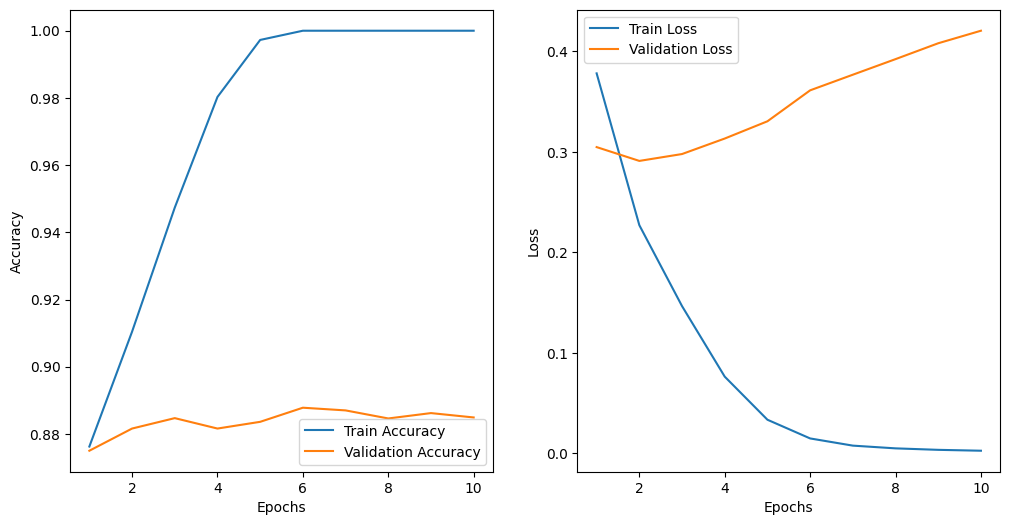

In [ ]:
def plot_results(num_epochs,train_accs,train_losses,eval_accs,eval_losses):
  epochs = list(range(1,num_epochs+1))
  fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
  axs[0].plot(epochs,train_accs,label='Train Accuracy')
  axs[0].plot(epochs,eval_accs,label='Validation Accuracy')
  axs[1].plot(epochs,train_losses,label='Train Loss')
  axs[1].plot(epochs,eval_losses,label='Validation Loss')
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Accuracy')
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Loss')
  axs[0].legend()
  axs[1].legend()
plot_results(num_epochs,train_accs,train_losses,eval_accs,eval_losses)

# Prediction

In [ ]:
model.load_state_dict(torch.load('model.pt'))
model = model.to(device)

In [ ]:
test_dataset = to_map_style_dataset(prepare_dataset(test_df))
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch)

In [ ]:
test_acc,test_loss = evaluate(model,criterion,test_dataloader)
test_acc,test_loss

(0.8904, 0.2760799896867969)